<h1 align = "center" > Heart Attack Analysis and Prediction </h1>

# 0.1 Setting Up Environment

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-csv/heart.csv


# 0.2 Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1.0 Project objectives and Key questions

**Objectives**

The objective of this analysis is to understand the factors associated with hearth attack risk and identify high-risk individuals

**Key Questions**
1. Which patient characteristics define high-risk vs low-risk groups
2. Which variables show the strongest relationship with heart attack occurrence?
3. 

# 2.0 Loading the Dataset

In [3]:
df = pd.read_csv("/kaggle/input/heart-csv/heart.csv")

# 3.0 Initial data analysis

## 3.1 Size and structure of data

In [4]:
df.shape

(303, 14)

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## 3.2 Checking for missing values

In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## 3.3 Checking for duplicate values

In [9]:
df.duplicated().any()

np.True_

### 3.3.1 Investigating duplicates

In [10]:
duplicates = df.duplicated().sum()
print("No of duplicate rows:",duplicates)

No of duplicate rows: 1


In [11]:
df[df.duplicated(keep=False)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


**Initial analysis output**
1. Data contains 303 rows and 14 columns 
2. All columns are numerical in nature with one column being a float data type, although there are categorical variables they have been encoded already.
3. There appear to be no missing values from initial analysis.
4. There is a single duplicate row

# 4.0 Data Cleaning

In [12]:
cleaned_df = df.copy()

## 4.1 Handling duplicates

In [13]:
cleaned_df.drop_duplicates(inplace=True)

In [14]:
cleaned_df.shape

(302, 14)

## 4.2 Normalizing column names

In [15]:
cleaned_df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [16]:
cleaned_df = cleaned_df.rename(columns={
    "age": "age",
    "trtbps": "trtbps",
    "chol": "chol",
    "thalachh": "thalach",
    "oldpeak": "oldpeak",
    "sex": "sex",
    "cp": "cp",
    "fbs": "fbs",
    "restecg": "rest_ecg",
    "exng": "exang",
    "slp": "slope",
    "caa": "ca",
    "thall": "thal",
    "output": "target"
})


**Data cleaning output**

Duplicate row dropped

# 5.0 Data Quality Check

In [17]:
cleaned_df.isnull()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
print(cleaned_df.duplicated().any())

False


In [19]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   rest_ecg  302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [20]:
print(df.shape)

(303, 14)


In [21]:
print(cleaned_df.shape)

(302, 14)


**Data quality check output**

1. Data has no missing values
2. Duplicates have been handled
3. All columns have the correct data type

# 6.0 Exploratory data analysis

In [22]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   rest_ecg  302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [23]:
cleaned_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
rest_ecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [24]:
cleaned_df['age'].describe()

count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64

In [25]:
cleaned_df['target'].value_counts(normalize=True)

target
1    0.543046
0    0.456954
Name: proportion, dtype: float64

## 6.1 Uni-variate analysis

In [26]:
cleaned_df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 6.1.1 Numerical variables analysis with Histplots

In [27]:
numerical_var = ["age", "trtbps", "chol", "thalach", "oldpeak"]

In [28]:
cleaned_df[numerical_var].describe()

,age,trtbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


In [29]:
title_map = {
    "age": "Age Distribution",
    "trtbps": "Resting Blood Pressure Distribution",
    "chol": "Cholesterol Distribution",
    "thalach": "Maximum Heart Rate Distribution",
    "oldpeak": "ST Depression Distribution"
}

xlabel_map = {
    "age": "Age",
    "trtbps": "Resting Blood Pressure (mm Hg)",
    "chol": "Cholesterol (mg/dL)",
    "thalach": "Max Heart Rate",
    "oldpeak": "ST Depression"
}

In [30]:
def plot_numeric_distributions(df, columns, title_map, xlabel_map, bins=10):
    for col in columns:
        fig, ax = plt.subplots()

        sns.histplot(
            data=df,
            x=col,
            bins=bins,
            edgecolor="black",
            ax=ax
        )

        ax.set_title(title_map[col])
        ax.set_xlabel(xlabel_map[col])
        ax.set_ylabel("Count")

        plt.show()

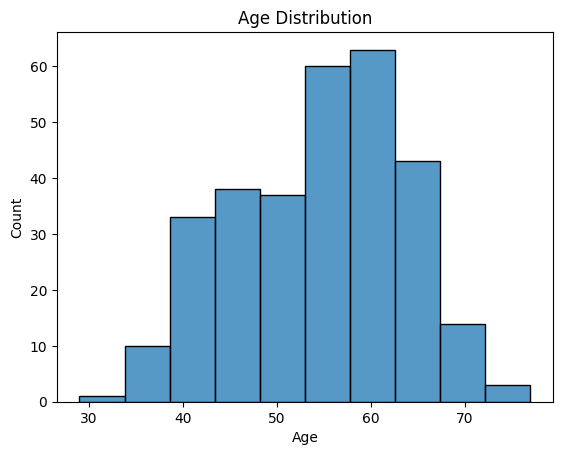

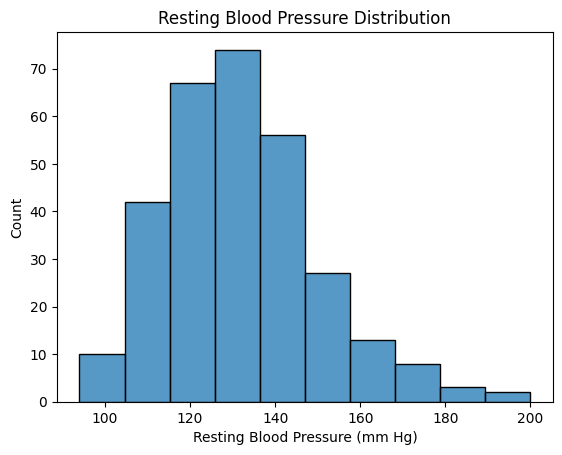

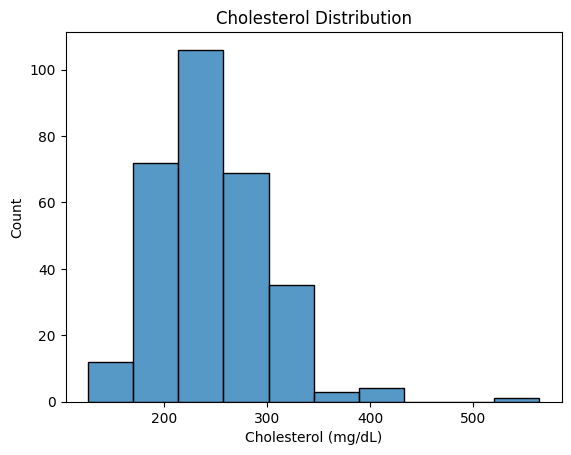

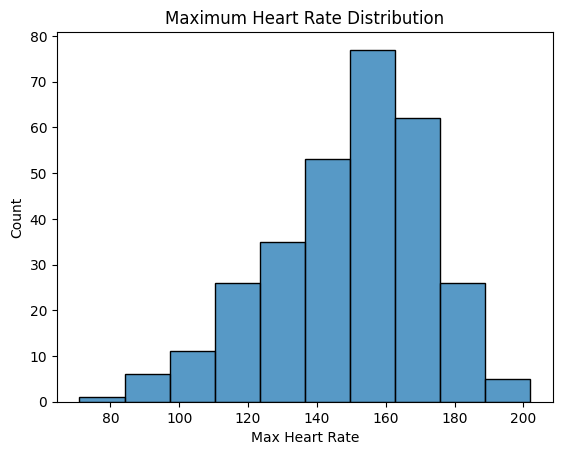

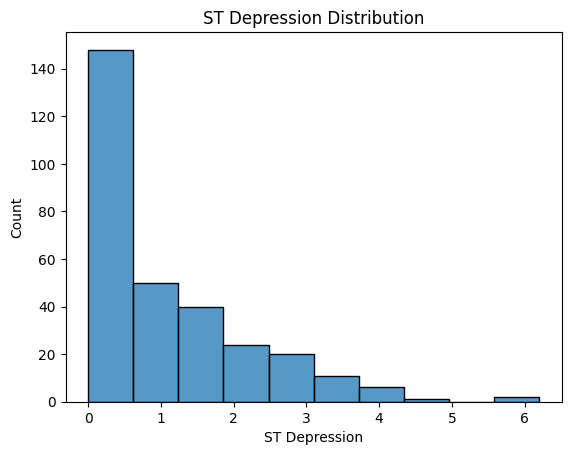

In [31]:
plot_numeric_distributions(cleaned_df, numerical_var, title_map, xlabel_map)


#### **Insights from Uni-variate analysis (Numerical)**

**1. Age**
* Age values range from 29 to 77 years.
* Most observations are concentrated between approximately 48 and 61 years, consistent with the interquartile range from the summary statistics.
* The distribution peaks in the mid-50s to early-60s, indicating that cases are most frequent in this age group.
* There is a noticeable decline in frequency beyond the early 60s, suggesting fewer observations at older ages.
* The mean (54.4) and median (55.0) are very close, indicating a roughly symmetric distribution with no strong skew.
* Overall, the age distribution suggests that prevalence increases into middle age and stabilizes before declining at older ages.

**2. Resting blood pressure**
* Most patients have resting blood pressure values between roughly 115 and 140 mm Hg.
* This range represents the most common values in the dataset.
* The distribution is right-skewed, indicating that a small number of patients have much higher blood pressure values.
* The majority of observations are clustered toward the lower end of the range.
* This suggests that elevated resting blood pressure is common among the patients, which aligns with its known association with cardiovascular risk.

**3. Cholesterol levels**

* Values range approximately from 30 to 570, indicating a wide spread.
* The distribution is right-skewed, with a long tail extending toward higher cholesterol values.
* Most observations are concentrated on the lower end of the range, with the majority of values falling between 160 and 300.
* The main peak of the distribution occurs between 220 and 250, where the highest frequency of observations is observed.
* Overall, the distribution is concentrated in the low-to-mid value range, with relatively few extreme high values.

**4. Max heart rate**
* Values range from approximately 60 to 200 bpm.
* The distribution is left-skewed (negatively skewed), indicating more observations at higher heart rate values.
* Frequencies increase steadily and peak around 148–163 bpm, which represents the modal range.
* After the peak, the distribution declines sharply, suggesting fewer individuals with extremely high maximum heart rates.
* Overall, the data is concentrated in the mid-to-high range, with relatively fewer low values.

**5. ST depression**
* Values range from approximately 0 to 6.
* The distribution is right-skewed (positively skewed), indicating a large concentration of observations at lower values with a long tail toward higher values.
* Frequencies peak near 0, showing that most individuals have little to no ST depression.
* After the initial peak, the distribution declines sharply, followed by a more gradual and nearly uniform decrease as values increase.
* Overall, the data is heavily concentrated at low values, with relatively few observations at higher levels of ST depression.

### 6.1.2 Categorical variables analysis with CountPlots

In [32]:
cleaned_df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'rest_ecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [33]:
categorical_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]

In [34]:
title_map_cat = {
    "sex": "Sex Distribution",
    "cp": "Chest Pain Type Distribution",
    "fbs": "Fasting Blood Sugar Distribution",
    "rest_ecg": "Resting ECG Results Distribution",
    "exang": "Exercise Induced Angina Distribution",
    "slope": "Slope of Peak Exercise ST Segment",
    "ca": "Number of Major Vessels Distribution",
    "thal": "Thalassemia Distribution",
    "target": "Target Destribution"
}

xlabel_map_cat = {
    "sex": "Sex",
    "cp": "Chest Pain Type",
    "fbs": "Fasting Blood Sugar",
    "rest_ecg": "Resting ECG Result",
    "exang": "Exercise Induced Angina",
    "slope": "ST Slope",
    "ca": "Number of Major Vessels",
    "thal": "Thalassemia Type",
    "target": "Heart Attack"
}


In [35]:
def plot_categorical_counts(df, columns, title_map, xlabel_map):
    for col in columns:
        fig, ax = plt.subplots()
        sns.countplot(
            data=df,
            x=col,
            ax=ax
        )
        ax.set_title(title_map[col])
        ax.set_xlabel(xlabel_map[col])
        ax.set_ylabel("Count")
        plt.show()

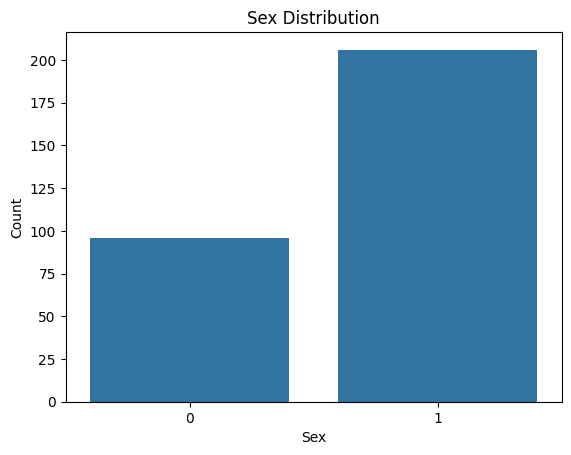

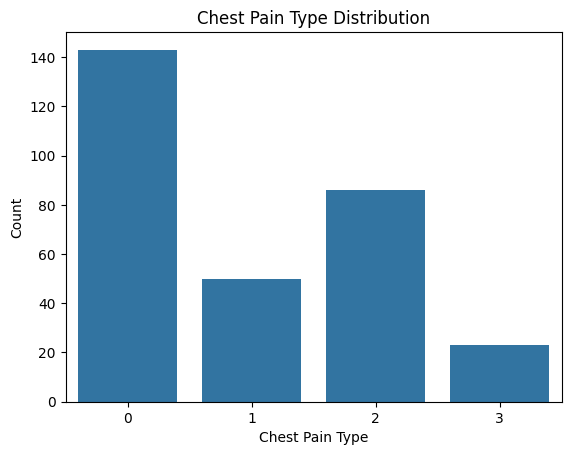

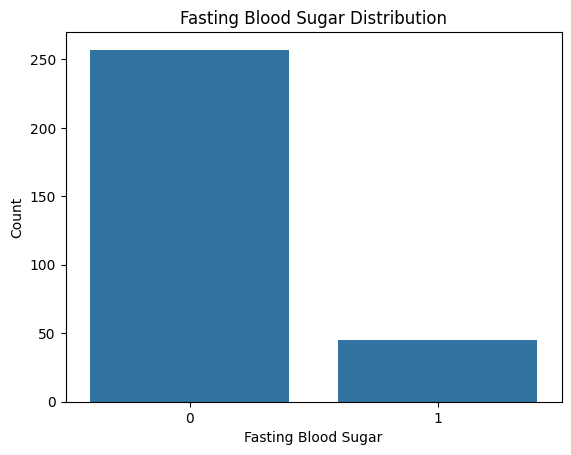

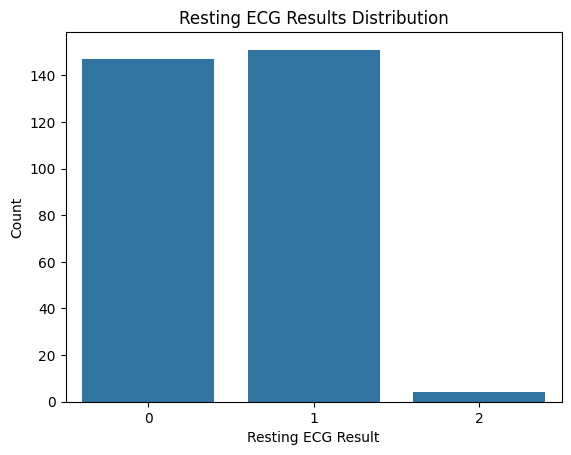

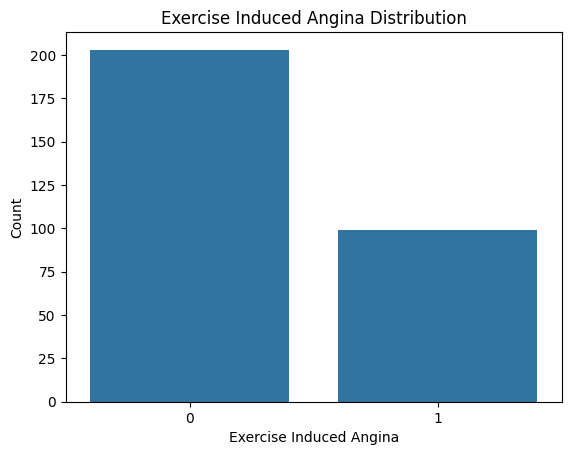

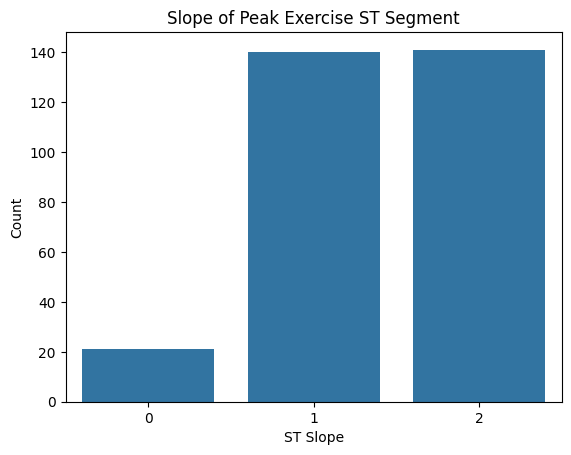

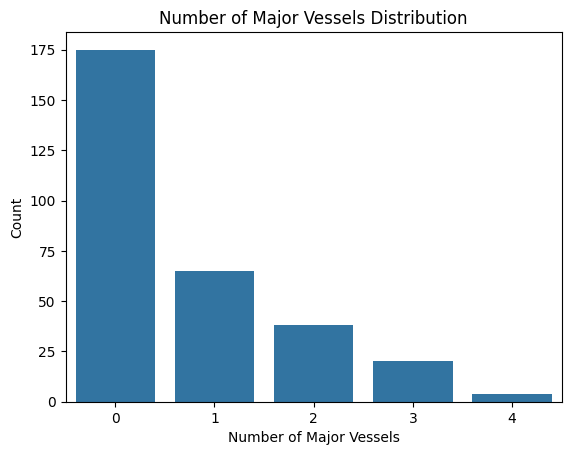

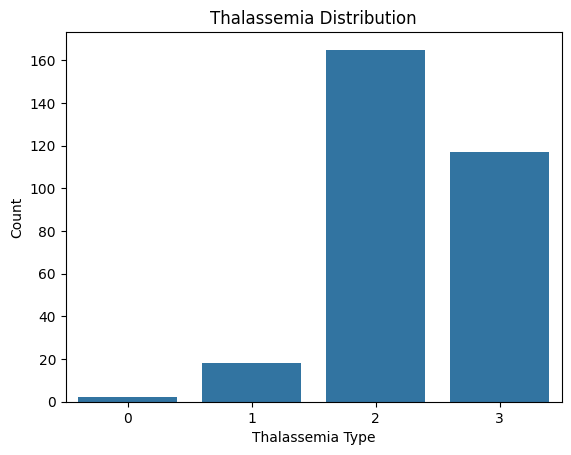

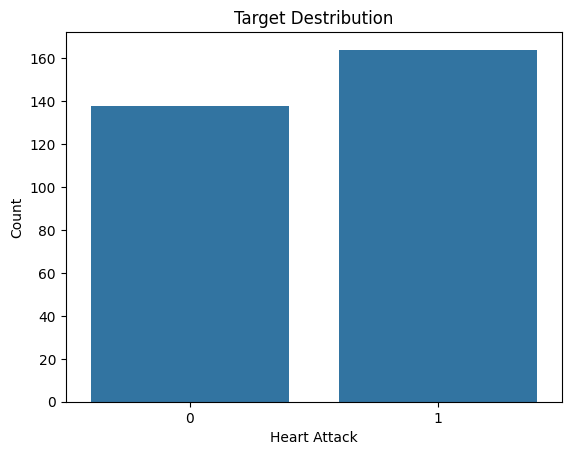

In [36]:
plot_categorical_counts(cleaned_df, categorical_var, title_map_cat, xlabel_map_cat)

#### **Insights from Uni-variate analysis (Categorical)**

**Sex**
The population shows a significant gender imbalance. There are more than twice as many instances of Category 1 (over 200) compared to Category 0 (under 100). This skew indicates that the model's performance will be primarily driven by the characteristics of Category 1.

**Chest Pain Type**
The data is dominated by Type 0, which appears in over 140 cases. The remaining three types are less frequent, with Type 3 representing the smallest subset of the population (approximately 20 cases). This suggests that the majority of patients in this study presented with Type 0 symptoms.

**Fasting Blood Sugar**
This variable exhibits very low variance. More than 250 participants are classified as Category 0 (FBS < 120 mg/dl), while fewer than 50 fall into Category 1. Due to this heavy concentration in a single category, Fasting Blood Sugar may offer limited predictive utility for the model.

**Resting ECG Results**
The dataset is split almost evenly between Category 0 and Category 1, with each containing roughly 140 to 150 samples. Conversely, Category 2 is an outlier with negligible representation, making it a statistically thin group for analysis.

**Exercise Induced Angina**
The distribution shows a clear 2:1 ratio. Approximately 200 patients did not experience angina during exercise (Value 0), while 100 patients did (Value 1). This provides a substantial sample size for both groups to evaluate the impact of exercise-induced pain on the target outcome.

**Slope of Peak Exercise ST Segment**
The ST Slope is concentrated in Categories 1 and 2, which show nearly identical counts of approximately 140 each. Slope 0 is rarely observed, appearing in only about 20 instances, which limits the ability to draw broad conclusions from that specific subgroup.

**Number of Major Vessels**
There is an inverse relationship between the number of vessels and frequency. Category 0 is the most prevalent (175+ cases), and frequency declines sharply as the vessel count increases. Categories 3 and 4 contain very few entries, representing a small fraction of the total data.

**Thalassemia Type**
The distribution peaks at Type 2 (over 160 cases), with Type 3 following as the second most common. Types 0 and 1 are rarely represented. Consequently, the relationship between Thalassemia and heart attack risk will be defined mostly by the interactions of Types 2 and 3.

**Target (Heart Attack)**
The target variable is well-balanced, which is ideal for classification tasks. There is a slightly higher frequency of Category 1 (Higher Risk) compared to Category 0 (Lower Risk). This balance ensures that the training process is not biased toward a majority class, allowing for more reliable sensitivity and specificity metrics.


## 6.2 Bi-variate analysis

### 6.2.1 Numerical Variables analysis with

**Insights from Bi-variate analysis (Numerical)**

### 6.2.2 Categorical Variables analysis with

**Insights from Bi-variate analysis (Categorical)**

# 7.0 Insights and Interpretations